# Assignment #2: Model evaluation

In this assignment we will use resampling methods for model evaluation and attribute selection. We will predict crime rate based on a large number of different attributes. We will program everything from scratch with the exception of the linear regression, which we will get from the SciKit-learn library.

## Download the dataset and prepare the data for linear regression

We will start by downloading the dataset and loading it into a dataframe. The target value is the last column called **ViolentCrimesPerPop**.

In [308]:
import pandas as pd

with open("data/communities.names") as f:
    columns = [l.split(" ")[1] for l in f.readlines() if l.startswith("@attribute")]

communities_crime = pd.read_csv('data/communities.data', header=None, names=columns, na_values='?')
communities_crime.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Now we have to remove the attributes **state**, **county**, **community**, **community name**, and **fold**, which are columns from 1 to 5.

In [309]:
communities_crime = communities_crime.drop(columns=["state", "county", "community", "communityname", "fold"])
communities_crime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Let's check if there are any duplicates we need to take care of.

In [310]:
communities_crime[communities_crime.duplicated()]

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop


Let's also check if there are any missing values for any of the attributes.

In [311]:
len(communities_crime[communities_crime.isnull().any(axis=1)])

1675

We see that 1675 out of 1994 rows contain missing values for some column. Let's find out, which these columns are.

In [312]:
missing_ratio = communities_crime.isnull().mean()
missing_ratio = missing_ratio[missing_ratio > 0]
len(missing_ratio)

23

In [313]:
missing_ratio

OtherPerCap             0.000502
LemasSwornFT            0.840020
LemasSwFTPerPop         0.840020
LemasSwFTFieldOps       0.840020
LemasSwFTFieldPerPop    0.840020
LemasTotalReq           0.840020
LemasTotReqPerPop       0.840020
PolicReqPerOffic        0.840020
PolicPerPop             0.840020
RacialMatchCommPol      0.840020
PctPolicWhite           0.840020
PctPolicBlack           0.840020
PctPolicHisp            0.840020
PctPolicAsian           0.840020
PctPolicMinor           0.840020
OfficAssgnDrugUnits     0.840020
NumKindsDrugsSeiz       0.840020
PolicAveOTWorked        0.840020
PolicCars               0.840020
PolicOperBudg           0.840020
LemasPctPolicOnPatr     0.840020
LemasGangUnitDeploy     0.840020
PolicBudgPerPop         0.840020
dtype: float64

Now we know that 23 attributes contain missing values.
1. Since for 22 of the columns have more than 80% of the data missing, it is better to drop the columns, because imputing values would not be so informative.
2. One of the columns called **OtherPepCap** has only less than 0.05% missing data, which means that it will be better if we impute value to the missing rows instead of dropping the column.

In [314]:
# Drop the columns, which have more than 80% missing data
threshold = 0.8
columns_to_drop = missing_ratio[missing_ratio > threshold].index
communities_crime.drop(columns_to_drop, axis=1, inplace=True)

In [315]:
missing_ratio = communities_crime.isnull().mean()
missing_ratio = missing_ratio[missing_ratio > 0]
missing_ratio

OtherPerCap    0.000502
dtype: float64

In [316]:
# We will impute the column's value in the missing column with the mean of the other values of this column
mean_value = communities_crime['OtherPerCap'].mean().round(2)
communities_crime['OtherPerCap'] = communities_crime['OtherPerCap'].fillna(mean_value)

In [317]:
len(communities_crime[communities_crime.isnull().any(axis=1)])

0

In [318]:
communities_crime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


As we can see we are left with 101 columns. The last think we have to do is to divide the dataset into dependent and independant features.

In [319]:
X = communities_crime.iloc[:, :-1].values
y = communities_crime.iloc[:, -1].values

In [320]:
X

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 0.32],
       [0.  , 0.16, 0.12, ..., 0.12, 0.45, 0.  ],
       [0.  , 0.42, 0.49, ..., 0.21, 0.02, 0.  ],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 0.91],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 0.22],
       [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

In [321]:
y

array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])

## Implement the cross-validation method and the leave-one-out method

First we will start with the implementation of k-fold cross validation, where the whole n dataset is divided into k parts to get fold size p = n/k, which will define out test data in each of all k iterations.

In [322]:
import numpy as np

In [323]:
def k_fold_cross_validation(X, y, model, k=5, evaluation_metric='MSE'):
  fold_size = len(X) // k
  scores = []

  # Throw error if we have n-fold cross validation and
  # want to evaluate it with R2 score
  if evaluation_metric == 'R2' and k == len(X):
    raise ValueError("Cannot calculate R2 score for n-fold cross validation.")

  for i in range(k):
    # Split the data into training and validation set
    start, end = i * fold_size, (i + 1) * fold_size
    X_train = np.concatenate([X[:start], X[end:]])
    y_train = np.concatenate([y[:start], y[end:]])
    X_test = X[start:end]
    y_test = y[start:end]

    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model
    if evaluation_metric == 'MSE':
      score = np.square(np.subtract(y_test, y_pred)).mean()
    elif evaluation_metric == 'MAE':
      score = np.abs(np.subtract(y_test, y_pred)).mean()
    elif evaluation_metric == 'RSE':
      rss = np.square(np.subtract(y_test, y_pred)).sum()
      score = np.sqrt(rss / (len(y_test) - 2))
    elif evaluation_metric == 'R2':
      rss = np.square(np.subtract(y_test, y_pred)).sum()
      tss = np.square(np.subtract(y_test, y_test.mean())).sum()
      score = 1 - np.divide(rss, tss)

    scores.append(score)

  return np.mean(scores)

As we can see we cannot calculate the R2-score if k is the same length as the data, since the divisor will always 0, because the test value and the mean of test value will always the same. This is happening because we will only have 1 data point in the testing data.

Now let's test the k-fold cross validation for, k=5 and k=10 and for each metric.

In [324]:
from sklearn.linear_model import LinearRegression

In [325]:
k5cv_mse_score = k_fold_cross_validation(X, y, model=LinearRegression(), k=5, evaluation_metric='MSE')
k5cv_mse_score

0.018943389600908668

In [326]:
k10cv_mse_score = k_fold_cross_validation(X, y, model=LinearRegression(), k=10, evaluation_metric='MSE')
k10cv_mse_score

0.018560498535009403

In [327]:
k5cv_mae_score = k_fold_cross_validation(X, y, model=LinearRegression(), k=5, evaluation_metric='MAE')
k5cv_mae_score

0.09671973161386435

In [328]:
k10cv_mae_score = k_fold_cross_validation(X, y, model=LinearRegression(), k=10, evaluation_metric='MAE')
k10cv_mae_score

0.095913681869637

In [329]:
k5cv_rse_score = k_fold_cross_validation(X, y, model=LinearRegression(), k=5, evaluation_metric='RSE')
k5cv_rse_score

0.13762500828760782

In [330]:
k10cv_rse_score = k_fold_cross_validation(X, y, model=LinearRegression(), k=10, evaluation_metric='RSE')
k10cv_rse_score

0.136486700766304

In [331]:
k5cv_r2_score = k_fold_cross_validation(X, y, LinearRegression(), k=5, evaluation_metric='R2')
k5cv_r2_score

0.6498860966919564

In [332]:
k10cv_r2_score = k_fold_cross_validation(X, y, LinearRegression(), k=10, evaluation_metric='R2')
k10cv_r2_score

0.6545500201206668

Next we will implement the leave-one-out cross validation, where out of all data points one data is left as test data and the rest is training data. So for n points we have to perform n iterations to cover each data point. We will avoid the computationally expensive process of re-fitting the model n-times by using the adjusted residuals (divided by 1 - leverage).

In [333]:
def loo_cross_validation(X, y, model, evaluation_metric='MSE'):
  scores = []

  # Make predictions
  model.fit(X, y)
  y_pred = model.predict(X)

  # Calculate residuals and leverages
  residuals = np.subtract(y, y_pred)
  H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
  leverages = np.diag(H)

  # Evaluate model
  adj_residuals = np.divide(residuals, (np.subtract(1, leverages)))
  if evaluation_metric == 'MSE':
    score = np.square(adj_residuals).mean()
  elif evaluation_metric == 'MAE':
    score = np.abs(adj_residuals).mean()
  elif evaluation_metric == 'RSE':
    rss = np.square(adj_residuals).sum()
    score = np.sqrt(rss / (len(y) - 2))

  return score

In this case, same as 1-fold cross validation, we can see that we cannot use R2-score. This is because the divisor is always 0 since the test value and the mean of test value are always the same since we use only one data for testing.

Now let's test also this implementation for each metric.

In [334]:
loocv_mse_score = loo_cross_validation(X, y, model=LinearRegression(), evaluation_metric='MSE')
loocv_mse_score

0.018502943923062738

In [335]:
loocv_mae_score = loo_cross_validation(X, y, model=LinearRegression(), evaluation_metric='MAE')
loocv_mae_score

0.09592965392105164

In [336]:
loocv_rse_score = loo_cross_validation(X, y, model=LinearRegression(), evaluation_metric='RSE')
loocv_rse_score

0.13609379550882375

In the end we will visualize all the scores we got from different cross validations and using different metrics.

In [337]:
import matplotlib.pyplot as plt

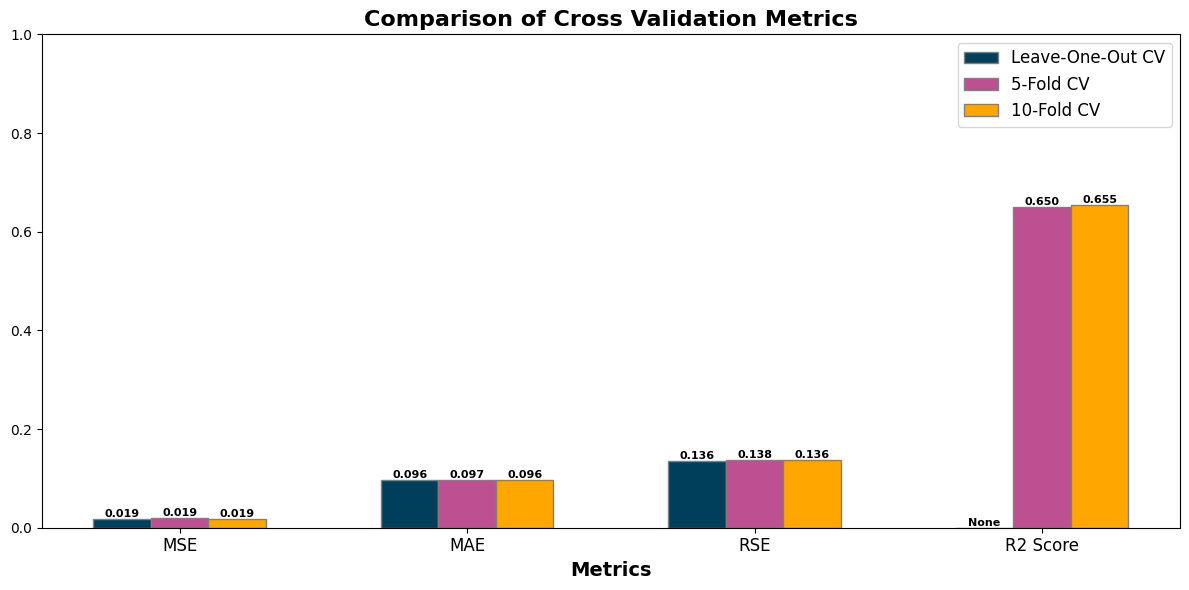

In [338]:
# Metrics
metrics = ['MSE', 'MAE', 'RSE', 'R2 Score']

# Values
loocv_scores = [loocv_mse_score, loocv_mae_score, loocv_rse_score, 0]
k5cv_scores = [k5cv_mse_score, k5cv_mae_score, k5cv_rse_score, k5cv_r2_score]
k10cv_scores = [k10cv_mse_score, k10cv_mae_score, k10cv_rse_score, k10cv_r2_score]

# Set position of bar on X axis
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the figure
plt.figure(figsize=(12, 6))

# Draw the plot
plt.bar(r1, loocv_scores, color='#003f5c', width=bar_width, edgecolor='grey', label='Leave-One-Out CV')
plt.bar(r2, k5cv_scores, color='#bc5090', width=bar_width, edgecolor='grey', label='5-Fold CV')
plt.bar(r3, k10cv_scores, color='#ffa600', width=bar_width, edgecolor='grey', label='10-Fold CV')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(metrics))], metrics, fontsize=12)

# Adding the scores on top of the bars
for i in range(len(loocv_scores)):
    if i == 3:
      plt.text(r1[i], loocv_scores[i] + 0.01, 'None', ha='center', va='center', fontsize=8, fontweight='bold')
    else:
      plt.text(r1[i], loocv_scores[i] + 0.01, f'{loocv_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r2[i], k5cv_scores[i] + 0.01, f'{k5cv_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r3[i], k10cv_scores[i] + 0.01, f'{k10cv_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')

# Adjust the y-axis limit
plt.ylim(0, 1)

# Add title and legend
plt.title('Comparison of Cross Validation Metrics', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

We can see that we get pretty much the same results for each metric using loo cross validation, 5-fold and 10-fold cross validation. The main difference is that loo cross validation the same as n-fold cross validation, doesn't allow us to use the R2 score as evaluation metric.

## Implement forward attribute selection and fit linear regression

These are the following steps to perform forward attribute selection.
1. We will train n models using each from n attributes individually and checking the performance.
2. We will choose the attribute, which gives the best performance.
3. We will repeat the process by adding one variable at a time to the attribute with best performance and we will again retain the attribute producing highest improvement.
4. We will repeat the process until there is no significant improvement in the model's performance.

The implementation will allow us to use cross validation or normal scoring based on the 4 main metrics **MSA**, **MAE**, **RSA**, **R2**. The models we will be fitting are linear regression models. We will also use the library joblib in order to parallelize the evaluation of different sets of attributes and improve the speed of the function.

In [339]:
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed

In [340]:
def evaluate_attribute(X, y, attribute, selected_attributes, k, kfcv, loocv, evaluation_metric):
  try_attributes = selected_attributes + [attribute]

  # If we have cross validation use the whole data if not use the splitted data
  if kfcv == True:
    metric = k_fold_cross_validation(X[:, try_attributes], y, model=LinearRegression(), k=k, evaluation_metric=evaluation_metric)
  elif loocv == True:
    metric = loo_cross_validation(X[:, try_attributes], y, model=LinearRegression(), evaluation_metric=evaluation_metric)
  else:
    # Determine the size of the split
    train_size = int(0.5 * len(X))
    # Split the data
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    X_try_train = X_train[:, try_attributes]
    X_try_test = X_test[:, try_attributes]

    # Train the model and make predictions
    model = LinearRegression()
    model.fit(X_try_train, y_train)
    y_pred = model.predict(X_try_test)

    # Evaluate the model
    if evaluation_metric == 'MSE':
      metric = np.square(np.subtract(y_test, y_pred)).mean()
    elif evaluation_metric == 'MAE':
      metric = np.abs(np.subtract(y_test, y_pred)).mean()
    elif evaluation_metric == 'RSE':
      rss = np.square(np.subtract(y_test, y_pred)).sum()
      metric = np.sqrt(rss / (len(y_test) - 2))
    elif evaluation_metric == 'R2':
      rss = np.square(np.subtract(y_test, y_pred)).sum()
      tss = np.square(np.subtract(y_test, y_test.mean())).sum()
      metric = 1 - np.divide(rss, tss)

  return metric, attribute

def forward_attribute_selection(X, y, k=0, kfcv=False, loocv=False, evaluation_metric='MSE'):
  remaining_attributes = list(range(X.shape[1]))
  selected_attributes = []
  prev_metric = None

  # Throw error if we have n-fold cross cross validation and
  # want to evaluate it with R2 score
  if (evaluation_metric == 'R2' and k == len(X) and kfcv == True):
    raise ValueError("Cannot calculate R2 score for n-fold cross validation.")

  # Throw error if we have leave-one-out cross validation and
  # want to evaluate it with R2 score
  if (evaluation_metric == 'R2' and loocv == True):
    raise ValueError("Cannot calculate R2 score for leave-one-out cross validation.")

  while remaining_attributes:
    # Parallel evaluation of attributes
    metric_with_attributes = Parallel(n_jobs=-1)(delayed(evaluate_attribute)(X, y, attribute, selected_attributes, k, kfcv, loocv, evaluation_metric) for attribute in remaining_attributes)

    # Sort the results based on the metric
    metric_with_attributes.sort(reverse=True if evaluation_metric == 'R2' else False)
    best_metric, best_attribute = metric_with_attributes[0]

    # If there is no improvement
    if prev_metric == None or (evaluation_metric == 'R2' and best_metric > prev_metric) or (evaluation_metric in ['MSE', 'MAE', 'RSE'] and best_metric < prev_metric):
      remaining_attributes.remove(best_attribute)
      selected_attributes.append(best_attribute)
      prev_metric = best_metric
    else:
      break

  return selected_attributes

Now let's test the attribute selection implementation for each metric.

In [341]:
selected_features_mse = forward_attribute_selection(X, y, evaluation_metric='MSE')
print(f"Selected {len(selected_features_mse)} Features with MSE:", selected_features_mse)

Selected 43 Features with MSE: [50, 41, 71, 68, 44, 7, 25, 88, 34, 43, 90, 48, 0, 99, 74, 64, 63, 38, 55, 66, 65, 67, 73, 15, 37, 11, 77, 24, 23, 61, 16, 49, 45, 26, 89, 51, 72, 22, 10, 95, 92, 36, 53]


In [342]:
selected_features_mae = forward_attribute_selection(X, y, evaluation_metric='MAE')
print(f"Selected {len(selected_features_mae)} Features with MAE:", selected_features_mae)

Selected 26 Features with MAE: [50, 44, 71, 3, 7, 68, 2, 88, 25, 48, 90, 0, 74, 99, 8, 34, 22, 15, 36, 77, 45, 49, 61, 94, 37, 5]


In [343]:
selected_features_rse = forward_attribute_selection(X, y, evaluation_metric='RSE')
print(f"Selected {len(selected_features_rse)} Features with RSE:", selected_features_rse)

Selected 43 Features with RSE: [50, 41, 71, 68, 44, 7, 25, 88, 34, 43, 90, 48, 0, 99, 74, 64, 63, 38, 55, 66, 65, 67, 73, 15, 37, 11, 77, 24, 23, 61, 16, 49, 45, 26, 89, 51, 72, 22, 10, 95, 92, 36, 53]


In [344]:
selected_features_r2 = forward_attribute_selection(X, y, evaluation_metric='R2')
print(f"Selected {len(selected_features_r2)} Features with R2:", selected_features_r2)

Selected 43 Features with R2: [50, 41, 71, 68, 44, 7, 25, 88, 34, 43, 90, 48, 0, 99, 74, 64, 63, 38, 55, 66, 65, 67, 73, 15, 37, 11, 77, 24, 23, 61, 16, 49, 45, 26, 89, 51, 72, 22, 10, 95, 92, 36, 53]


## Use attribute selection method with the cross validation method to select reasonable set of attributes for the linear model

Eventhough we showed that we get pretty similar score with each cross validation method, that small difference may be important when choosing attributes. This is why we will now use loo, 5-fold and 10-fold cross validations in order to select attributes. First we will start with k-fold feature selection for k=5 and k=10 for all metrics.

In [345]:
selected_features_k5cv_mse = forward_attribute_selection(X, y, k=5, kfcv=True, evaluation_metric='MSE')
print(f"Selected {len(selected_features_k5cv_mse)} Features with 5-fold cross validation and MSE:", selected_features_k5cv_mse)

Selected 52 Features with 5-fold cross validation and MSE: [44, 3, 71, 11, 48, 38, 50, 90, 10, 68, 2, 7, 88, 25, 74, 86, 28, 82, 85, 18, 13, 15, 75, 41, 35, 33, 29, 8, 23, 69, 14, 21, 20, 22, 63, 64, 39, 65, 84, 66, 67, 79, 19, 12, 99, 72, 47, 51, 80, 26, 9, 70]


In [346]:
selected_features_k10cv_mse = forward_attribute_selection(X, y, k=10, kfcv=True, evaluation_metric='MSE')
print(f"Selected {len(selected_features_k10cv_mse)} Features with 10-fold cross validation and MSE:", selected_features_k10cv_mse)

Selected 45 Features with 10-fold cross validation and MSE: [44, 3, 71, 11, 48, 90, 38, 50, 10, 68, 2, 7, 88, 25, 86, 15, 39, 28, 14, 82, 85, 18, 13, 33, 41, 29, 79, 62, 64, 75, 74, 99, 23, 69, 80, 9, 21, 31, 87, 24, 34, 98, 36, 94, 67]


In [347]:
selected_features_k5cv_mae = forward_attribute_selection(X, y, k=5, kfcv=True, evaluation_metric='MAE')
print(f"Selected {len(selected_features_k5cv_mae)} Features with 5-fold cross validation and MAE:", selected_features_k5cv_mae)

Selected 18 Features with 5-fold cross validation and MAE: [50, 44, 3, 71, 7, 68, 2, 36, 48, 90, 27, 15, 88, 39, 99, 74, 18, 23]


In [348]:
selected_features_k10cv_mae = forward_attribute_selection(X, y, k=10, kfcv=True, evaluation_metric='MAE')
print(f"Selected {len(selected_features_k10cv_mae)} Features with 10-fold cross validation and MAE:", selected_features_k10cv_mae)

Selected 18 Features with 10-fold cross validation and MAE: [50, 44, 3, 71, 7, 68, 2, 36, 90, 27, 48, 15, 88, 39, 99, 74, 18, 23]


In [349]:
selected_features_k5cv_rse = forward_attribute_selection(X, y, k=5, kfcv=True, evaluation_metric='RSE')
print(f"Selected {len(selected_features_k5cv_rse)} Features with 5-fold cross validation and RSE:", selected_features_k5cv_rse)

Selected 50 Features with 5-fold cross validation and RSE: [44, 3, 71, 11, 48, 90, 38, 50, 10, 68, 2, 7, 88, 25, 74, 86, 15, 28, 8, 18, 13, 82, 85, 75, 41, 33, 35, 29, 23, 99, 69, 87, 14, 21, 20, 62, 1, 39, 22, 64, 65, 66, 67, 84, 72, 51, 26, 47, 19, 12]


In [350]:
selected_features_k10cv_rse = forward_attribute_selection(X, y, k=10, kfcv=True, evaluation_metric='RSE')
print(f"Selected {len(selected_features_k10cv_rse)} Features with 10-fold cross validation and RSE:", selected_features_k10cv_rse)

Selected 45 Features with 10-fold cross validation and RSE: [44, 3, 71, 11, 48, 90, 38, 50, 10, 68, 2, 7, 88, 25, 86, 15, 39, 28, 14, 82, 85, 18, 41, 75, 74, 13, 33, 29, 62, 79, 64, 99, 23, 69, 87, 80, 9, 21, 31, 24, 34, 98, 36, 94, 67]


In [351]:
selected_features_k5cv_r2 = forward_attribute_selection(X, y, k=5, kfcv=True, evaluation_metric='R2')
print(f"Selected {len(selected_features_k5cv_r2)} Features with 5-fold cross validation and R2:", selected_features_k5cv_r2)

Selected 50 Features with 5-fold cross validation and R2: [44, 3, 71, 11, 48, 38, 50, 90, 10, 68, 7, 2, 88, 25, 74, 86, 99, 15, 28, 8, 18, 13, 41, 33, 35, 75, 82, 85, 29, 23, 69, 14, 87, 21, 20, 22, 62, 1, 39, 64, 65, 66, 67, 84, 72, 51, 26, 47, 19, 12]


In [352]:
selected_features_k10cv_r2 = forward_attribute_selection(X, y, k=10, kfcv=True, evaluation_metric='R2')
print(f"Selected {len(selected_features_k10cv_r2)} Features with 10-fold cross validation and R2:", selected_features_k10cv_r2)

Selected 45 Features with 10-fold cross validation and R2: [44, 3, 71, 11, 48, 38, 50, 90, 10, 68, 7, 2, 88, 25, 86, 15, 28, 14, 8, 99, 18, 41, 35, 23, 82, 85, 75, 21, 66, 74, 67, 73, 64, 29, 13, 33, 19, 84, 39, 62, 79, 12, 80, 9, 22]


We will do the same thing for the leave-one-out cross validation.

In [353]:
selected_features_loocv_mse = forward_attribute_selection(X, y, loocv=True, evaluation_metric='MSE')
print(f"Selected {len(selected_features_loocv_mse)} Features with leave-one-out cross validation and MSE:", selected_features_loocv_mse)

Selected 42 Features with leave-one-out cross validation and MSE: [44, 3, 71, 11, 48, 90, 38, 50, 10, 68, 2, 7, 88, 25, 18, 86, 28, 82, 85, 13, 21, 39, 33, 34, 41, 15, 31, 8, 23, 75, 74, 24, 14, 99, 87, 62, 64, 69, 98, 29, 36, 9]


In [354]:
selected_features_loocv_mae = forward_attribute_selection(X, y, loocv=True, evaluation_metric='MAE')
print(f"Selected {len(selected_features_loocv_mae)} Features with leave-one-out cross validation and MAE:", selected_features_loocv_mae)

Selected 29 Features with leave-one-out cross validation and MAE: [50, 44, 3, 71, 7, 68, 2, 12, 90, 0, 88, 99, 11, 15, 39, 10, 36, 45, 13, 23, 89, 84, 82, 79, 33, 48, 8, 22, 18]


In [355]:
selected_features_loocv_rse = forward_attribute_selection(X, y, loocv=True, evaluation_metric='RSE')
print(f"Selected {len(selected_features_loocv_rse)} Features with leave-one-out cross validation and RSE:", selected_features_loocv_rse)

Selected 42 Features with leave-one-out cross validation and RSE: [44, 3, 71, 11, 48, 90, 38, 50, 10, 68, 2, 7, 88, 25, 18, 86, 28, 82, 85, 13, 21, 39, 33, 34, 41, 15, 31, 8, 23, 75, 74, 24, 14, 99, 87, 62, 64, 69, 98, 29, 36, 9]


Now let's visualize the selected attributes with different evaluation metrics and cross validation techniques to see what is the difference between them.

In [356]:
def indices_to_names(indices):
    return [communities_crime.columns[i] for i in indices]

In [357]:
# Convert indices to names
attributes_mse = indices_to_names(selected_features_mse)
attributes_mae = indices_to_names(selected_features_mae)
attributes_rse = indices_to_names(selected_features_rse)
attributes_r2 = indices_to_names(selected_features_r2)

attributes_k5cv_mse = indices_to_names(selected_features_k5cv_mse)
attributes_k5cv_mae = indices_to_names(selected_features_k5cv_mae)
attributes_k5cv_rse = indices_to_names(selected_features_k5cv_rse)
attributes_k5cv_r2 = indices_to_names(selected_features_k5cv_r2)

attributes_k10cv_mse = indices_to_names(selected_features_k10cv_mse)
attributes_k10cv_mae = indices_to_names(selected_features_k10cv_mae)
attributes_k10cv_rse = indices_to_names(selected_features_k10cv_rse)
attributes_k10cv_r2 = indices_to_names(selected_features_k10cv_r2)

attributes_loocv_mse = indices_to_names(selected_features_loocv_mse)
attributes_loocv_mae = indices_to_names(selected_features_loocv_mae)
attributes_loocv_rse = indices_to_names(selected_features_loocv_rse)

In [358]:
# Table representation
import plotly.graph_objects as go

In [359]:
data = {
  "Normal attribute extraction" : {
    "MSE": attributes_mse,
    "MAE": attributes_mae,
    "RSE": attributes_rse,
    "R2": attributes_r2,
  },
  "5-fold attribute extraction": {
    "MSE": attributes_k5cv_mse,
    "MAE": attributes_k5cv_mae,
    "RSE": attributes_k5cv_rse,
    "R2": attributes_k5cv_r2,
  },
  "10-fold attribute extraction": {
    "MSE": attributes_k10cv_mse,
    "MAE": attributes_k10cv_mae,
    "RSE": attributes_k10cv_rse,
    "R2": attributes_k10cv_r2,
  },
  "LOO attribute extraction": {
    "MSE": attributes_loocv_mse,
    "MAE": attributes_loocv_mae,
    "RSE": attributes_loocv_rse
  }
}

df = pd.DataFrame.from_dict(data, orient='index').transpose()

# Convert attribute lists to strings so they can be categorized
df = df.applymap(lambda x: ', '.join(map(str, x)) if isinstance(x, (list, tuple)) else x)

# Create a table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df[col].tolist() for col in df.columns],
               fill_color='lavender',
               align='left'))
])

styled_table = df.style.background_gradient(cmap='Blues')
styled_table

,Normal attribute extraction,5-fold attribute extraction,10-fold attribute extraction,LOO attribute extraction
MSE,"PctIlleg, TotalPctDiv, HousVacant, PctPersDenseHous, PctKids2Par, agePct12t29, OtherPerCap, MedOwnCostPctIncNoMtg, PctEmplManu, PctFam2Par, NumStreet, PctWorkMom, population, LemasPctOfficDrugUn, PctVacantBoarded, PersPerOccupHous, PctLargHouseOccup, MalePctDivorce, PctImmigRec10, PersPerRentOccHous, PersPerOwnOccHous, PctPersOwnOccup, PctHousOwnOcc, pctWInvInc, PctOccupMgmtProf, pctUrban, PctHousNoPhone, AsianPerCap, indianPerCap, PctNotSpeakEnglWell, pctWSocSec, NumIlleg, PctYoungKids2Par, HispPerCap, NumInShelters, NumImmig, PctHousOccup, blackPerCap, numbUrban, PctSameState85, PctBornSameState, PctOccupManu, PctImmigRec5","PctKids2Par, racePctWhite, HousVacant, pctUrban, PctWorkMom, MalePctDivorce, PctIlleg, NumStreet, numbUrban, PctPersDenseHous, racepctblack, agePct12t29, MedOwnCostPctIncNoMtg, OtherPerCap, PctVacantBoarded, MedRentPctHousInc, PctPopUnderPov, RentLowQ, MedRent, pctWRetire, pctWWage, pctWInvInc, PctVacMore6Mos, TotalPctDiv, PctEmplProfServ, PctEmploy, PctLess9thGrade, agePct16t24, indianPerCap, PctHousLess3BR, pctWFarmSelf, whitePerCap, perCapInc, blackPerCap, PctLargHouseOccup, PersPerOccupHous, MalePctNevMarr, PersPerOwnOccHous, RentHighQ, PersPerRentOccHous, PctPersOwnOccup, OwnOccLowQuart, medFamInc, medIncome, LemasPctOfficDrugUn, PctHousOccup, PctWorkMomYoungKids, NumImmig, OwnOccMedVal, HispPerCap, agePct65up, MedNumBR","PctKids2Par, racePctWhite, HousVacant, pctUrban, PctWorkMom, NumStreet, MalePctDivorce, PctIlleg, numbUrban, PctPersDenseHous, racepctblack, agePct12t29, MedOwnCostPctIncNoMtg, OtherPerCap, MedRentPctHousInc, pctWInvInc, MalePctNevMarr, PctPopUnderPov, pctWFarmSelf, RentLowQ, MedRent, pctWRetire, pctWWage, PctEmploy, TotalPctDiv, PctLess9thGrade, OwnOccLowQuart, PctLargHouseFam, PersPerOccupHous, PctVacMore6Mos, PctVacantBoarded, LemasPctOfficDrugUn, indianPerCap, PctHousLess3BR, OwnOccMedVal, agePct65up, whitePerCap, PctBSorMore, MedOwnCostPctInc, AsianPerCap, PctEmplManu, PctUsePubTrans, PctOccupManu, PctSameCity85, PctPersOwnOccup","PctKids2Par, racePctWhite, HousVacant, pctUrban, PctWorkMom, NumStreet, MalePctDivorce, PctIlleg, numbUrban, PctPersDenseHous, racepctblack, agePct12t29, MedOwnCostPctIncNoMtg, OtherPerCap, pctWRetire, MedRentPctHousInc, PctPopUnderPov, RentLowQ, MedRent, pctWWage, whitePerCap, MalePctNevMarr, PctEmploy, PctEmplManu, TotalPctDiv, pctWInvInc, PctBSorMore, agePct16t24, indianPerCap, PctVacMore6Mos, PctVacantBoarded, AsianPerCap, pctWFarmSelf, LemasPctOfficDrugUn, MedOwnCostPctInc, PctLargHouseFam, PersPerOccupHous, PctHousLess3BR, PctUsePubTrans, PctLess9thGrade, PctOccupManu, agePct65up"
MAE,"PctIlleg, PctKids2Par, HousVacant, racePctWhite, agePct12t29, PctPersDenseHous, racepctblack, MedOwnCostPctIncNoMtg, OtherPerCap, PctWorkMom, NumStreet, population, PctVacantBoarded, LemasPctOfficDrugUn, agePct16t24, PctEmplManu, blackPerCap, pctWInvInc, PctOccupManu, PctHousNoPhone, PctYoungKids2Par, NumIlleg, PctNotSpeakEnglWell, PctSameCity85, PctOccupMgmtProf, racePctHisp","PctIlleg, PctKids2Par, racePctWhite, HousVacant, agePct12t29, PctPersDenseHous, racepctblack, PctOccupManu, PctWorkMom, NumStreet, NumUnderPov, pctWInvInc, MedOwnCostPctIncNoMtg, MalePctNevMarr, LemasPctOfficDrugUn, PctVacantBoarded, pctWRetire, indianPerCap","PctIlleg, PctKids2Par, racePctWhite, HousVacant, agePct12t29, PctPersDenseHous, racepctblack, PctOccupManu, NumStreet, NumUnderPov, PctWorkMom, pctWInvInc, MedOwnCostPctIncNoMtg, MalePctNevMarr, LemasPctOfficDrugUn, PctVacantBoarded, pctWRetire, indianPerCap","PctIlleg, PctKids2Par, racePctWhite, HousVacant, agePct12t29, PctPersDenseHous, racepctblack, medIncome, NumStreet, population, MedOwnCostPctIncNoMtg, LemasPctOfficDrugUn, pctUrban, pctWInvInc, MalePctNevMarr, numbUrban, PctOccupManu, PctYoungKids2Par, pctWWage, indianPerCap, NumInShelters, RentHighQ, RentLowQ, OwnOccLowQuart, PctEmploy, PctWorkMom, agePct16t24, b

We can see that in all cases the metric **MAE** returns the least attributes. Let's try to visualize the attributes on a plot.

In [360]:
import seaborn as sns

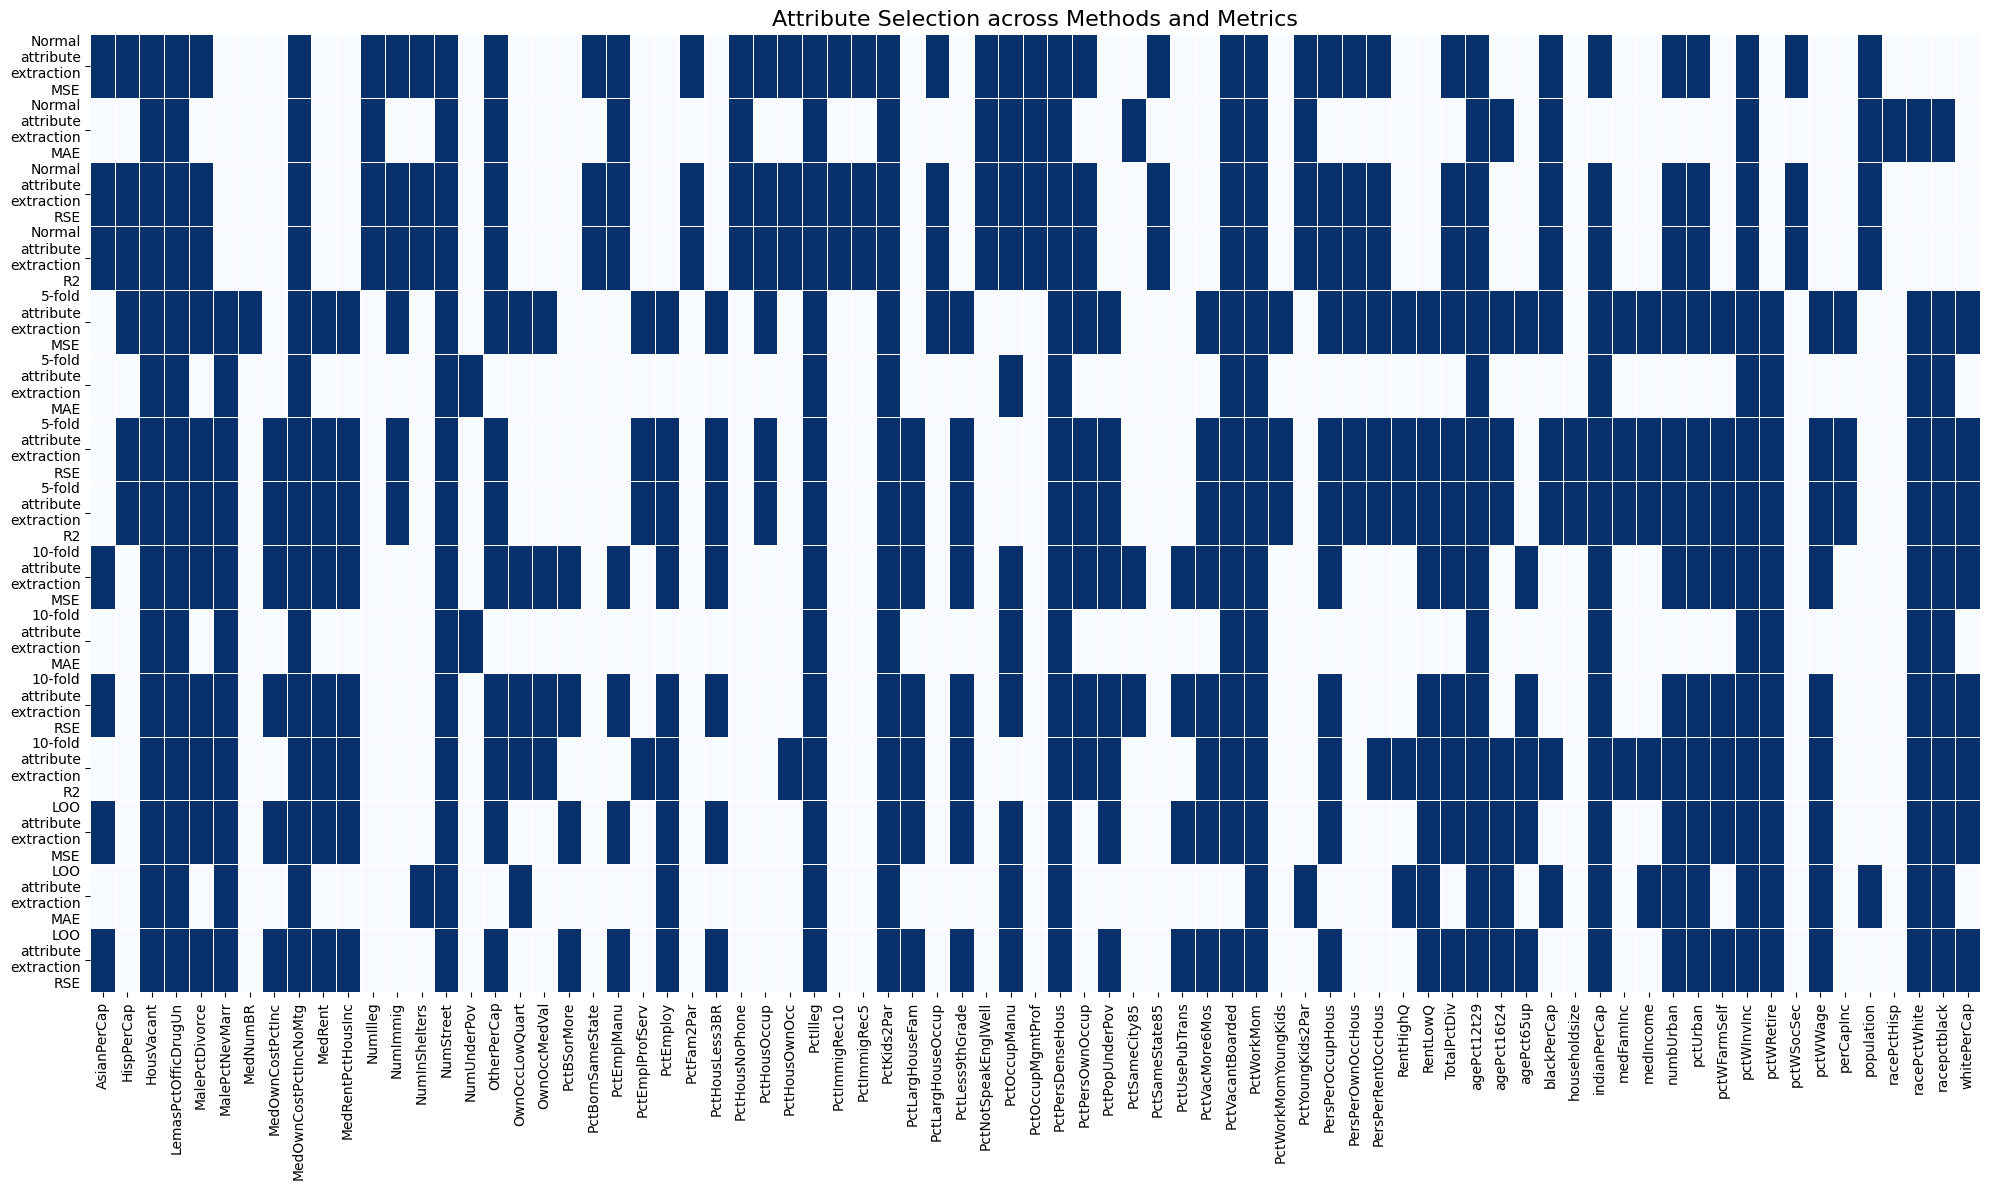

In [361]:
# Convert your data to a binary representation
# Store all unique attributes across methods
all_attributes = set()
for method in data:
    for metric, attributes in data[method].items():
        all_attributes.update(attributes)

all_attributes = sorted(list(all_attributes))

binary_data = {}
for method, metrics in data.items():
    binary_data[method] = {}
    for metric, attributes in metrics.items():
        binary_data[method][metric] = [1 if att in attributes else 0 for att in all_attributes]

binary_df = pd.DataFrame.from_dict({(i, j): binary_data[i][j]
                                   for i in binary_data.keys()
                                   for j in binary_data[i].keys()},
                                   orient='index')

# Create the heatmap
plt.figure(figsize=(20, 12))  # Increase the figure size
sns.heatmap(binary_df, yticklabels=binary_df.index, xticklabels=all_attributes, cbar=False, cmap="Blues", linewidths=.5)  # Add linewidths for better visibility

# Rotate x labels for better visibility
plt.xticks(rotation=90)

# Improve the y-labels by separating method and metric
plt.yticks(fontsize=10)  # Reduce the font size
labels = [' '.join(label).replace(' ', '\n') for label in binary_df.index]
plt.gca().set_yticklabels(labels, ha='right')

plt.title('Attribute Selection across Methods and Metrics', fontsize=16)
plt.tight_layout()
plt.show()

We can see that 10 of the attributes are extracted by using all of the techniques: **HousVacant**, **LemasPctOfficDrugUn**, **MedOwnCostPctIncNoMtg**, **NumStreet**, **PctIlleg**, **PctKids2Par**, **PctPersDenseHous**, **PctWorkMom**, **agePct12t29** and **pctWInvInc**. This means that these attributes must be very important.

## Test the model

Now we will generate data for each of the selected attributes to find out how good is actually each set of attributes for training linear regression. Let's start with generating the training and test set with the selected features from the forward attribute extraction.

In [362]:
import random

def train_test_split(X, y, test_size=0.5, random_seed=None):
  # Shuffle the data
  if random_seed is not None:
    np.random.seed(random_seed)

  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)

  # Determine the size of the split
  train_size = int((1 - test_size) * len(X))
  train_indices = indices[:train_size]
  test_indices = indices[train_size:]

  # Split the data
  X_train, y_train = X[train_indices], y[train_indices]
  X_test, y_test = X[test_indices], y[test_indices]

  return X_train, y_train, X_test, y_test

In [363]:
# Split the data with attributes from the normal forward attribute extraction
X_train_mse, y_train_mse, X_test_mse, y_test_mse = train_test_split(X[:, selected_features_mse], y, test_size=0.5, random_seed=42)
X_train_mae, y_train_mae, X_test_mae, y_test_mae = train_test_split(X[:, selected_features_mae], y, test_size=0.5, random_seed=42)
X_train_rse, y_train_rse, X_test_rse, y_test_rse = train_test_split(X[:, selected_features_rse], y, test_size=0.5, random_seed=42)
X_train_r2, y_train_r2, X_test_r2, y_test_r2 = train_test_split(X[:, selected_features_r2], y, test_size=0.5, random_seed=42)

In [364]:
# Split the data with attributes from the forward attribute extraction with 5-fold cross validation
X_train_k5cv_mse, y_train_k5cv_mse, X_test_k5cv_mse, y_test_k5cv_mse = train_test_split(X[:, selected_features_k5cv_mse], y, test_size=0.5, random_seed=42)
X_train_k5cv_mae, y_train_k5cv_mae, X_test_k5cv_mae, y_test_k5cv_mae = train_test_split(X[:, selected_features_k5cv_mae], y, test_size=0.5, random_seed=42)
X_train_k5cv_rse, y_train_k5cv_rse, X_test_k5cv_rse, y_test_k5cv_rse = train_test_split(X[:, selected_features_k5cv_rse], y, test_size=0.5, random_seed=42)
X_train_k5cv_r2, y_train_k5cv_r2, X_test_k5cv_r2, y_test_k5cv_r2 = train_test_split(X[:, selected_features_k5cv_r2], y, test_size=0.5, random_seed=42)

In [365]:
# Split the data with attributes from the forward attribute extraction with 10-fold cross validation
X_train_k10cv_mse, y_train_k10cv_mse, X_test_k10cv_mse, y_test_k10cv_mse = train_test_split(X[:, selected_features_k10cv_mse], y, test_size=0.5, random_seed=42)
X_train_k10cv_mae, y_train_k10cv_mae, X_test_k10cv_mae, y_test_k10cv_mae = train_test_split(X[:, selected_features_k10cv_mae], y, test_size=0.5, random_seed=42)
X_train_k10cv_rse, y_train_k10cv_rse, X_test_k10cv_rse, y_test_k10cv_rse = train_test_split(X[:, selected_features_k10cv_rse], y, test_size=0.5, random_seed=42)
X_train_k10cv_r2, y_train_k10cv_r2, X_test_k10cv_r2, y_test_k10cv_r2 = train_test_split(X[:, selected_features_k10cv_r2], y, test_size=0.5, random_seed=42)

In [366]:
# Split the data with attributes from the forward attribute extraction with leave-one-out cross validation
X_train_loocv_mse, y_train_loocv_mse, X_test_loocv_mse, y_test_loocv_mse = train_test_split(X[:, selected_features_loocv_mse], y, test_size=0.5, random_seed=42)
X_train_loocv_mae, y_train_loocv_mae, X_test_loocv_mae, y_test_loocv_mae = train_test_split(X[:, selected_features_loocv_mae], y, test_size=0.5, random_seed=42)
X_train_loocv_rse, y_train_loocv_rse, X_test_loocv_rse, y_test_loocv_rse = train_test_split(X[:, selected_features_loocv_rse], y, test_size=0.5, random_seed=42)

Now when we have prepared the data we can train and evaluate models using each of the datasets.

In [367]:
def evaluation(y_true, y_pred):
  # Calculate the MSE
  mse = np.square(np.subtract(y_true, y_pred)).mean()
  # Calculate the MAE
  mae = np.abs(np.subtract(y_true, y_pred)).mean()
  # Calculate the RSE
  rss = np.square(np.subtract(y_true, y_pred)).sum()
  rse = np.sqrt(rss / (len(y_true) - 2))
  # Calculate the R^2
  tss = np.square(np.subtract(y_true, y_true.mean())).sum()
  r2_score = 1 - np.divide(rss, tss)

  return mse, mae, rse, r2_score

In [368]:
# Test models using attributes from the normal forward attribute extraction
model_11 = LinearRegression().fit(X_train_mse, y_train_mse)
y_pred_11 = model_11.predict(X_test_mse)
mse_11, mae_11, rse_11, r2_score_11 = evaluation(y_test_mse, y_pred_11)

model_12 = LinearRegression().fit(X_train_mae, y_train_mae)
y_pred_12 = model_12.predict(X_test_mae)
mse_12, mae_12, rse_12, r2_score_12 = evaluation(y_test_mae, y_pred_12)

model_13 = LinearRegression().fit(X_train_rse, y_train_rse)
y_pred_13 = model_13.predict(X_test_rse)
mse_13, mae_13, rse_13, r2_score_13 = evaluation(y_test_rse, y_pred_13)

model_14 = LinearRegression().fit(X_train_r2, y_train_r2)
y_pred_14 = model_14.predict(X_test_r2)
mse_14, mae_14, rse_14, r2_score_14 = evaluation(y_test_r2, y_pred_14)

In [369]:
# Test models using attributes from forward attribute extraction with 5-fold cross validation
model_21 = LinearRegression().fit(X_train_k5cv_mse, y_train_k5cv_mse)
y_pred_21 = model_21.predict(X_test_k5cv_mse)
mse_21, mae_21, rse_21, r2_score_21 = evaluation(y_test_k5cv_mse, y_pred_21)

model_22 = LinearRegression().fit(X_train_k5cv_mae, y_train_k5cv_mae)
y_pred_22 = model_22.predict(X_test_k5cv_mae)
mse_22, mae_22, rse_22, r2_score_22 = evaluation(y_test_k5cv_mae, y_pred_22)

model_23 = LinearRegression().fit(X_train_k5cv_rse, y_train_k5cv_rse)
y_pred_23 = model_23.predict(X_test_k5cv_rse)
mse_23, mae_23, rse_23, r2_score_23 = evaluation(y_test_k5cv_rse, y_pred_23)

model_24 = LinearRegression().fit(X_train_k5cv_r2, y_train_k5cv_r2)
y_pred_24 = model_24.predict(X_test_k5cv_r2)
mse_24, mae_24, rse_24, r2_score_24 = evaluation(y_test_k5cv_r2, y_pred_24)

In [370]:
# Test models using attributes from forward attribute extraction with 10-fold cross validation
model_31 = LinearRegression().fit(X_train_k10cv_mse, y_train_k10cv_mse)
y_pred_31 = model_31.predict(X_test_k10cv_mse)
mse_31, mae_31, rse_31, r2_score_31 = evaluation(y_test_k10cv_mse, y_pred_31)

model_32 = LinearRegression().fit(X_train_k10cv_mae, y_train_k10cv_mae)
y_pred_32 = model_32.predict(X_test_k10cv_mae)
mse_32, mae_32, rse_32, r2_score_32 = evaluation(y_test_k10cv_mae, y_pred_32)

model_33 = LinearRegression().fit(X_train_k10cv_rse, y_train_k10cv_rse)
y_pred_33 = model_33.predict(X_test_k10cv_rse)
mse_33, mae_33, rse_33, r2_score_33 = evaluation(y_test_k10cv_rse, y_pred_33)

model_34 = LinearRegression().fit(X_train_k10cv_r2, y_train_k10cv_r2)
y_pred_34 = model_34.predict(X_test_k10cv_r2)
mse_34, mae_34, rse_34, r2_score_34 = evaluation(y_test_k10cv_r2, y_pred_34)

In [371]:
# Test models using attributes from forward attribute extraction with leave-one-out cross validation
model_41 = LinearRegression().fit(X_train_loocv_mse, y_train_loocv_mse)
y_pred_41 = model_41.predict(X_test_loocv_mse)
mse_41, mae_41, rse_41, r2_score_41 = evaluation(y_test_loocv_mse, y_pred_41)

model_42 = LinearRegression().fit(X_train_loocv_mae, y_train_loocv_mae)
y_pred_42 = model_42.predict(X_test_loocv_mae)
mse_42, mae_42, rse_42, r2_score_42 = evaluation(y_test_loocv_mae, y_pred_42)

model_43 = LinearRegression().fit(X_train_loocv_rse, y_train_loocv_rse)
y_pred_43 = model_43.predict(X_test_loocv_rse)
mse_43, mae_43, rse_43, r2_score_43 = evaluation(y_test_loocv_rse, y_pred_43)

Now when we have tested the models using different forward attribute selection techniques, it's time to visualize the results.

In [372]:
# Table representation
results = {
    'Normal attribute extraction': {
        'model 1 (MSE)': {'mse': mse_11, 'mae': mae_11, 'rse': rse_11, 'r2': r2_score_11},
        'model 2 (MAE)': {'mse': mse_12, 'mae': mae_12, 'rse': rse_12, 'r2': r2_score_12},
        'model 3 (RSE)': {'mse': mse_13, 'mae': mae_13, 'rse': rse_13, 'r2': r2_score_13},
        'model 4 (R2)': {'mse': mse_14, 'mae': mae_14, 'rse': rse_14, 'r2': r2_score_14},
    },
    '5-fold attribute extraction': {
        'model 1 (MSE)': {'mse': mse_21, 'mae': mae_21, 'rse': rse_21, 'r2': r2_score_21},
        'model 2 (MAE)': {'mse': mse_22, 'mae': mae_22, 'rse': rse_22, 'r2': r2_score_22},
        'model 3 (RSE)': {'mse': mse_23, 'mae': mae_23, 'rse': rse_23, 'r2': r2_score_23},
        'model 4 (R2)': {'mse': mse_24, 'mae': mae_24, 'rse': rse_24, 'r2': r2_score_24},
    },
    '10-fold attribute extraction': {
        'model 1 (MSE)': {'mse': mse_31, 'mae': mae_31, 'rse': rse_31, 'r2': r2_score_31},
        'model 2 (MAE)': {'mse': mse_32, 'mae': mae_32, 'rse': rse_32, 'r2': r2_score_32},
        'model 3 (RSE)': {'mse': mse_33, 'mae': mae_33, 'rse': rse_33, 'r2': r2_score_33},
        'model 4 (R2)': {'mse': mse_34, 'mae': mae_34, 'rse': rse_34, 'r2': r2_score_34},
    },
    'LOO attribute extraction': {
        'model 1 (MSE)': {'mse': mse_41, 'mae': mae_41, 'rse': rse_41, 'r2': r2_score_41},
        'model 2 (MAE)': {'mse': mse_42, 'mae': mae_42, 'rse': rse_42, 'r2': r2_score_42},
        'model 3 (RSE)': {'mse': mse_43, 'mae': mae_43, 'rse': rse_43, 'r2': r2_score_43},
        'model 4 (R2)': {'mse': 0, 'mae': 0, 'rse': 0, 'r2': 0},
    },
}

data = []

for extraction_method, models in results.items():
    for model, metrics in models.items():
        for metric, value in metrics.items():
            data.append([extraction_method, model, metric, value])

df = pd.DataFrame(data, columns=['extraction_method', 'model', 'metric', 'value'])
df

,extraction_method,model,metric,value
0,Normal attribute extraction,model 1 (MSE),mse,0.019641
1,Normal attribute extraction,model 1 (MSE),mae,0.097556
2,Normal attribute extraction,model 1 (MSE),rse,0.140286
3,Normal attribute extraction,model 1 (MSE),r2,0.640019
4,Normal attribute extraction,model 2 (MAE),mse,0.019501
...,...,...,...,...
59,LOO attribute extraction,model 3 (RSE),r2,0.663034
60,LOO attribute extraction,model 4 (R2),mse,0.000000
61,LOO attribute extraction,model 4 (R2),mae,0.000000
62,LOO attribute extraction,model 4 (R2),rse,0.000000


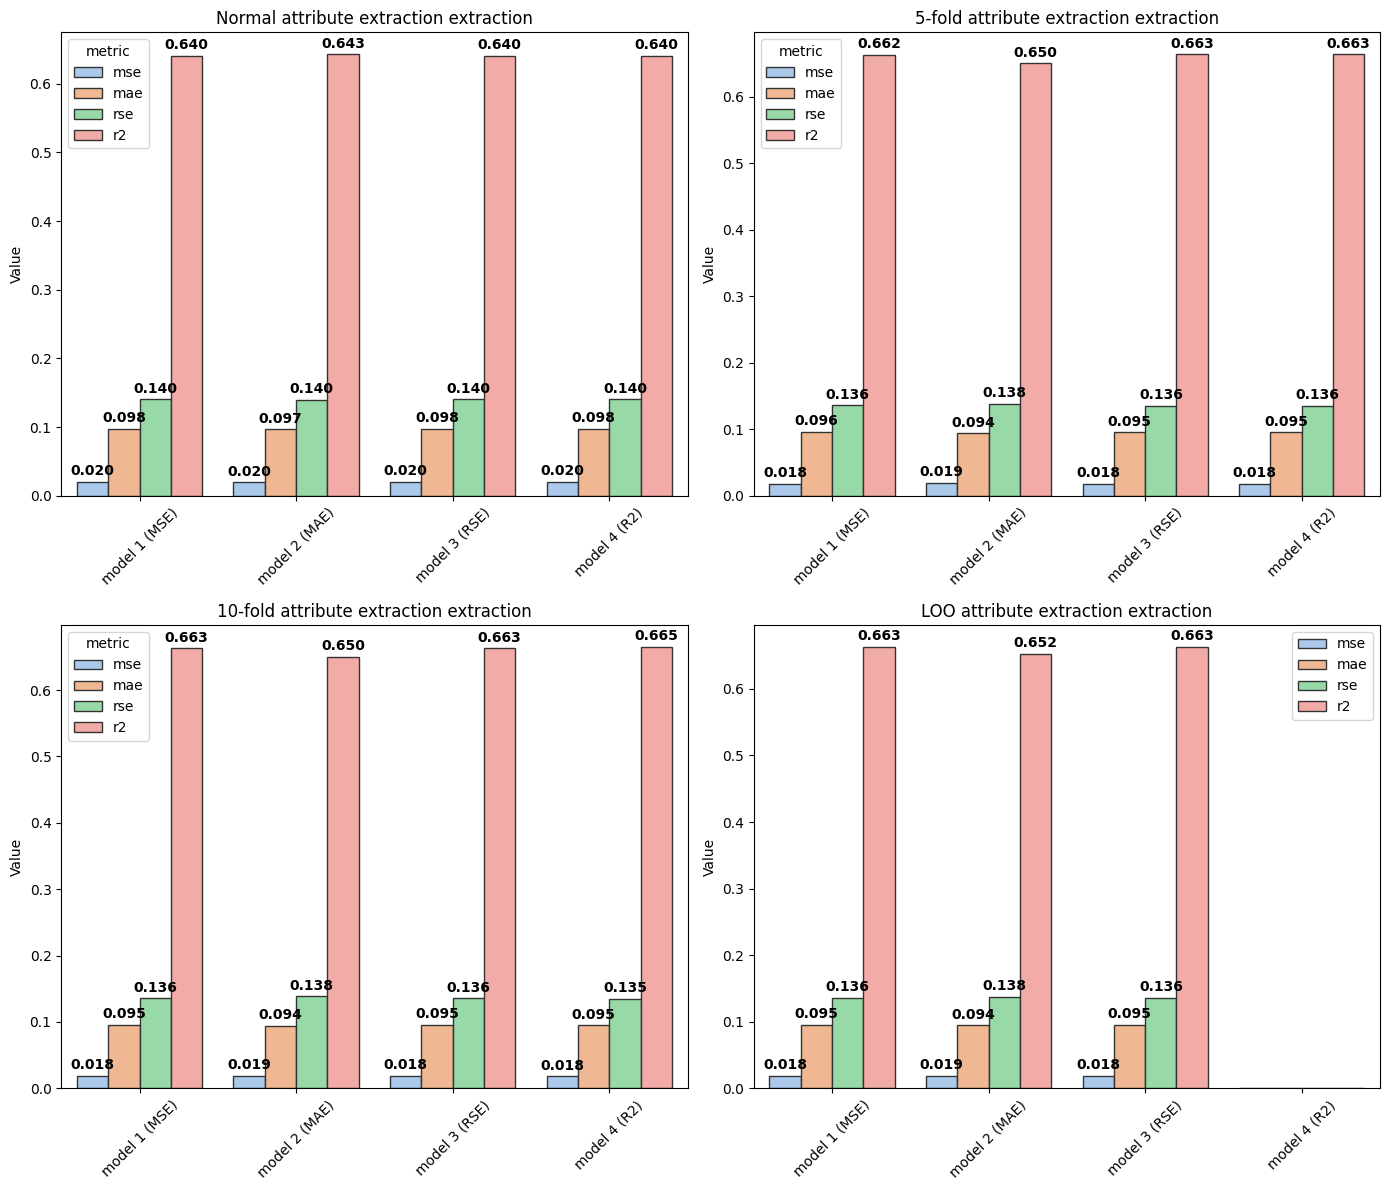

In [373]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

extraction_methods = df['extraction_method'].unique()

for i, method in enumerate(extraction_methods):
    ax = axes[i//2, i%2]

    # Filter the data for the current extraction method
    data = df[df['extraction_method'] == method]

    # Create the barplot on the current axis
    sns.barplot(data=data, x="model", y="value", hue="metric", palette="pastel", ax=ax, edgecolor=".2", linewidth=1, dodge=0.7)

    # Add value labels to the bars
    for p in ax.patches:
        height = p.get_height()
        if height == 0:  # Check if the height of the bar is 0
            label = ''
        else:
            label = '{:,.3f}'.format(height)  # Format to 3 decimal places
        ax.text(p.get_x() + p.get_width()/2., p.get_y() + height + 0.01, label, ha="center", fontweight='bold')

    # Set title and labels for the subplot
    ax.set_title(f"{method} extraction")
    ax.set_xlabel("")
    ax.set_ylabel("Value")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout and display the figure
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

It seems that the normal forward attribute extraction gives the worst results for all metrics compared to the 5-fold, 10-fold and loo cross validaiton. We can see that the other extraction types have similar results:
1. For all metrics of constructed models all attribute extractions using cross validation seem to give similar scores.
2. We see that in general the scores from 10-fold attribute extraction seem to be the best. In this plot, we get best values by contricting model with the attributes collected with R2.

In [374]:
print(f"Selected attributes from MSE ({len(selected_features_k10cv_mse)})", np.sort(selected_features_k10cv_mse))

Selected attributes from MSE (45) [ 2  3  7  9 10 11 13 14 15 18 21 23 24 25 28 29 31 33 34 36 38 39 41 44
 48 50 62 64 67 68 69 71 74 75 79 80 82 85 86 87 88 90 94 98 99]


In [375]:
print(f"Selected attributes from MAE ({len(selected_features_k10cv_mae)})", np.sort(selected_features_k10cv_mae))

Selected attributes from MAE (18) [ 2  3  7 15 18 23 27 36 39 44 48 50 68 71 74 88 90 99]


In [376]:
print(f"Selected attributes from RSE ({len(selected_features_k10cv_rse)})", np.sort(selected_features_k10cv_rse))

Selected attributes from RSE (45) [ 2  3  7  9 10 11 13 14 15 18 21 23 24 25 28 29 31 33 34 36 38 39 41 44
 48 50 62 64 67 68 69 71 74 75 79 80 82 85 86 87 88 90 94 98 99]


In [377]:
print(f"Selected attributes from R2 ({len(selected_features_k10cv_r2)})", np.sort(selected_features_k10cv_r2))

Selected attributes from R2 (45) [ 2  3  7  8  9 10 11 12 13 14 15 18 19 21 22 23 25 28 29 33 35 38 39 41
 44 48 50 62 64 66 67 68 71 73 74 75 79 80 82 84 85 86 88 90 99]


In [378]:
np.array_equal(np.sort(selected_features_k10cv_r2), np.sort(selected_features_k10cv_rse))

False

In [379]:
np.array_equal(np.sort(selected_features_k10cv_mse), np.sort(selected_features_k10cv_rse))

True

In [380]:
print(set(selected_features_k10cv_r2) - set(selected_features_k10cv_mse))

{66, 35, 8, 73, 12, 19, 84, 22}


In [381]:
print(indices_to_names(set(selected_features_k10cv_r2) - set(selected_features_k10cv_mse)))

['PersPerRentOccHous', 'PctEmplProfServ', 'agePct16t24', 'PctHousOwnOcc', 'medIncome', 'medFamInc', 'RentHighQ', 'blackPerCap']


We can see that the attributes obtained using MSE and RSE are the same. The attributes chosen with MAE seem to be the least, but the scores are a little lower. The number of attributes chosen with R2 is the same as with MSE and RSE, but some of the attributes are different. Since it gives slightly better scores we will continue working with these **45** attributes.

In [382]:
attributes_k10cv_r2

['PctKids2Par',
 'racePctWhite',
 'HousVacant',
 'pctUrban',
 'PctWorkMom',
 'MalePctDivorce',
 'PctIlleg',
 'NumStreet',
 'numbUrban',
 'PctPersDenseHous',
 'agePct12t29',
 'racepctblack',
 'MedOwnCostPctIncNoMtg',
 'OtherPerCap',
 'MedRentPctHousInc',
 'pctWInvInc',
 'PctPopUnderPov',
 'pctWFarmSelf',
 'agePct16t24',
 'LemasPctOfficDrugUn',
 'pctWRetire',
 'TotalPctDiv',
 'PctEmplProfServ',
 'indianPerCap',
 'RentLowQ',
 'MedRent',
 'PctVacMore6Mos',
 'whitePerCap',
 'PersPerRentOccHous',
 'PctVacantBoarded',
 'PctPersOwnOccup',
 'PctHousOwnOcc',
 'PersPerOccupHous',
 'PctLess9thGrade',
 'pctWWage',
 'PctEmploy',
 'medFamInc',
 'RentHighQ',
 'MalePctNevMarr',
 'PctLargHouseFam',
 'OwnOccLowQuart',
 'medIncome',
 'OwnOccMedVal',
 'agePct65up',
 'blackPerCap']

Let's see how this improves the model compared with using all attributes.

In [383]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.5, random_seed=42)

In [384]:
model_all = LinearRegression().fit(X_train, y_train)
y_pred = model_all.predict(X_test)
mse, mae, rse, r2_score = evaluation(y_test, y_pred)

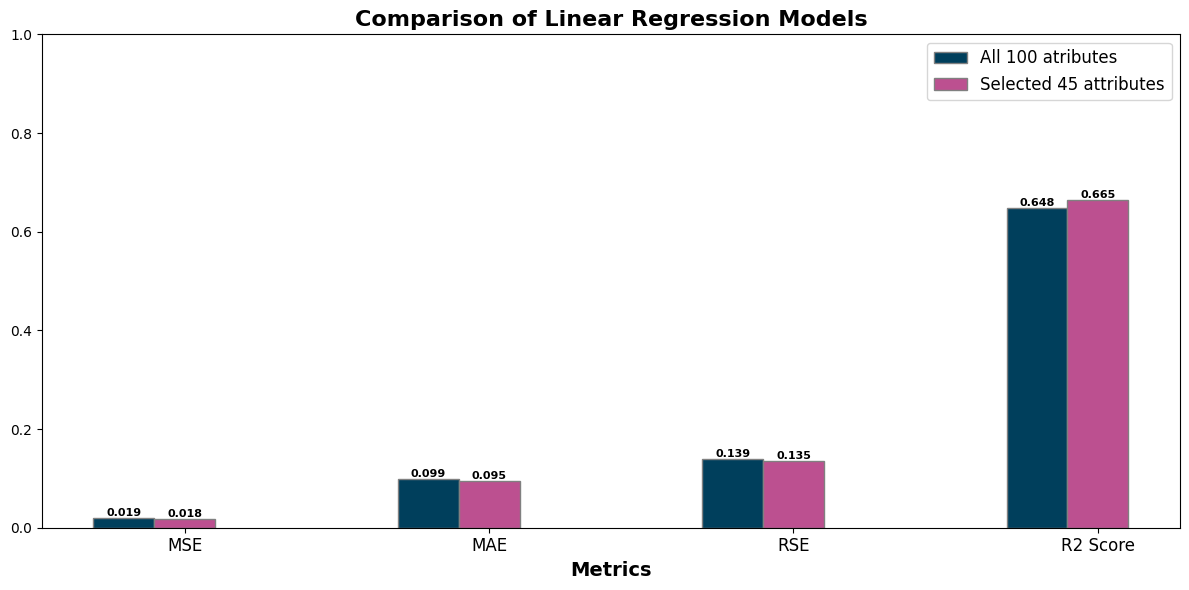

In [385]:
# Metrics
metrics = ['MSE', 'MAE', 'RSE', 'R2 Score']

# Values
scores_all = [mse, mae, rse, r2_score]
scores_improved = [mse_34, mae_34, rse_34, r2_score_34]

# Set position of bar on X axis
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Plot the figure
plt.figure(figsize=(12, 6))

# Draw the plot
plt.bar(r1, scores_all, color='#003f5c', width=bar_width, edgecolor='grey', label='All 100 atributes')
plt.bar(r2, scores_improved, color='#bc5090', width=bar_width, edgecolor='grey', label='Selected 45 attributes')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(metrics))], metrics, fontsize=12)

# Adding the scores on top of the bars
for i in range(len(loocv_scores)):
    plt.text(r1[i], scores_all[i] + 0.01, f'{scores_all[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r2[i], scores_improved[i] + 0.01, f'{scores_improved[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')

# Adjust the y-axis limit
plt.ylim(0, 1)

# Add title and legend
plt.title('Comparison of Linear Regression Models', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

We can see the improvement by using only less than half attributes.

## Implement the bootstrap method and apply it to train set to generate 1000 different train sets and train 1000 different linear models

Now let's generate 1000 different train sets and train 1000 different linear models using the bootstrap method and using only the selected attributes.

In [386]:
# Generate 1000 bootstrap samples (train and test sets)
bootstrap_datasets = [train_test_split(X[:, selected_features_k10cv_r2], y, test_size=0.5, random_seed=i) for i in range(1000)]
len(bootstrap_datasets)

1000

In [387]:
# Train 1000 different linear models
bootstrap_models = [LinearRegression().fit(X_train, y_train) for X_train, y_train, _, _ in bootstrap_datasets]
len(bootstrap_models)

1000

## Use the bootstrap results to assess the confidence intervals of the results of the linear model

Let's calculate the 95% confidence interval for the coefficients, predictions and evaluation scores from all these 1000 models.


In [388]:
coefficients = [model.coef_ for model in bootstrap_models]
coeff_conf_intervals = np.percentile(coefficients, [2.5, 97.5], axis=0)
coeff_conf_intervals.shape

(2, 45)

In [389]:
predictions = [model.predict(X_test) for model, (_, _, X_test, _) in zip(bootstrap_models, bootstrap_datasets)]
pred_conf_intervals = np.percentile(predictions, [2.5, 97.5], axis=0)
pred_conf_intervals.shape

(2, 997)

In [390]:
mse_scores = [np.square(np.subtract(y_test, y_pred)).mean() for y_pred, (_, _, _, y_test) in zip(predictions, bootstrap_datasets)]
mse_score_conf_intervals = np.percentile(mse_scores, [2.5, 97.5])
mse_score_conf_intervals

array([0.0165219 , 0.02019309])

In [391]:
mae_scores = [np.abs(np.subtract(y_test, y_pred)).mean() for y_pred, (_, _, _, y_test) in zip(predictions, bootstrap_datasets)]
mae_score_conf_intervals = np.percentile(mae_scores, [2.5, 97.5])
mae_score_conf_intervals

array([0.09145186, 0.09950591])

In [392]:
rse_scores = [np.sqrt(np.square(np.subtract(y_test, y_pred)).sum() / (len(y_test) - 2)) for y_pred, (_, _, _, y_test) in zip(predictions, bootstrap_datasets)]
rse_score_conf_intervals = np.percentile(rse_scores, [2.5, 97.5])
rse_score_conf_intervals

array([0.12866667, 0.14224513])

In [393]:
r2_scores = [1 - (np.square(np.subtract(y_test, y_pred)).sum() / np.square(np.subtract(y_test, y_test.mean())).sum()) for y_pred, (_, _, _, y_test) in zip(predictions, bootstrap_datasets)]
r2_score_conf_intervals = np.percentile(r2_scores, [2.5, 97.5])
r2_score_conf_intervals

array([0.63130208, 0.69180566])

Let's analyze the confidence intervals we got.

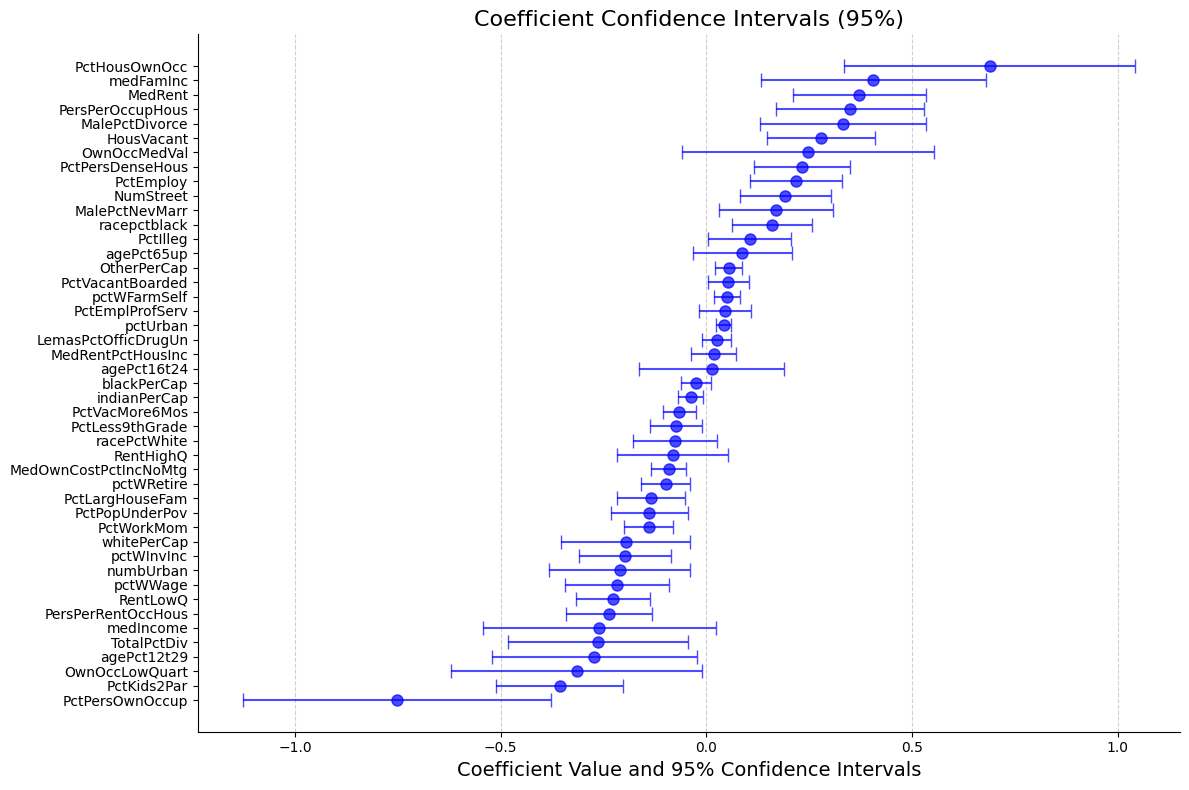

In [394]:
# Define the feature names
feature_names = np.array(communities_crime.iloc[:, selected_features_k10cv_r2].columns)

# Sort the features by their coefficient values for a more organized look
mean_coefficients = np.mean(coeff_conf_intervals, axis=0)
sorted_indices = np.argsort(mean_coefficients)
lower_bounds_sorted = coeff_conf_intervals[0, sorted_indices]
upper_bounds_sorted = coeff_conf_intervals[1, sorted_indices]
mean_coefficients_sorted = mean_coefficients[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Increase the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the forest plot with larger labels and rotated y-ticks for readability
plt.errorbar(mean_coefficients_sorted, np.arange(len(feature_names_sorted)),
             xerr=[mean_coefficients_sorted - lower_bounds_sorted, upper_bounds_sorted - mean_coefficients_sorted],
             fmt='o', capsize=5, markersize=8, color='blue', alpha=0.7)
plt.yticks(np.arange(len(feature_names_sorted)), feature_names_sorted, fontsize=10, rotation=0)  # Rotate to 0 or another angle if horizontal labels overlap
plt.xlabel('Coefficient Value and 95% Confidence Intervals', fontsize=14)
plt.title('Coefficient Confidence Intervals (95%)', fontsize=16)

# Adding grid, removing spines, and setting axis limits
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

Each dot on the plot represents the mean estimate of the coefficient from the 1000 different models and the lines represent the 95% confidence intervals. As we can see, the attribute **PctHousOwnOcc** has high positive coefficient and the attribute **PctPersOwnOccup** has high negative coefficient, but they both have wide confidence interval, which suggest that there's a lot of unvertainty or variability in the estimate of their coefficients. On the other hand attributes like **PctKids2Par** and **MedRent** also have high coefficient values but also have more narrow confidence intervals, which makes them more relable predictors in the model. We can also see that there are some attributes that have coefficients very close to zero such as **agePct16t24**, **MedRentPctHousinc**, **LemasPctOfficDrugUn**, etc, which suggests that they are not significant predictors.

In [395]:
true_vals = [y_test for model, (_, _, _, y_test) in zip(bootstrap_models, bootstrap_datasets)]
true_conf_intervals = np.percentile(true_vals, [2.5, 97.5], axis=0)

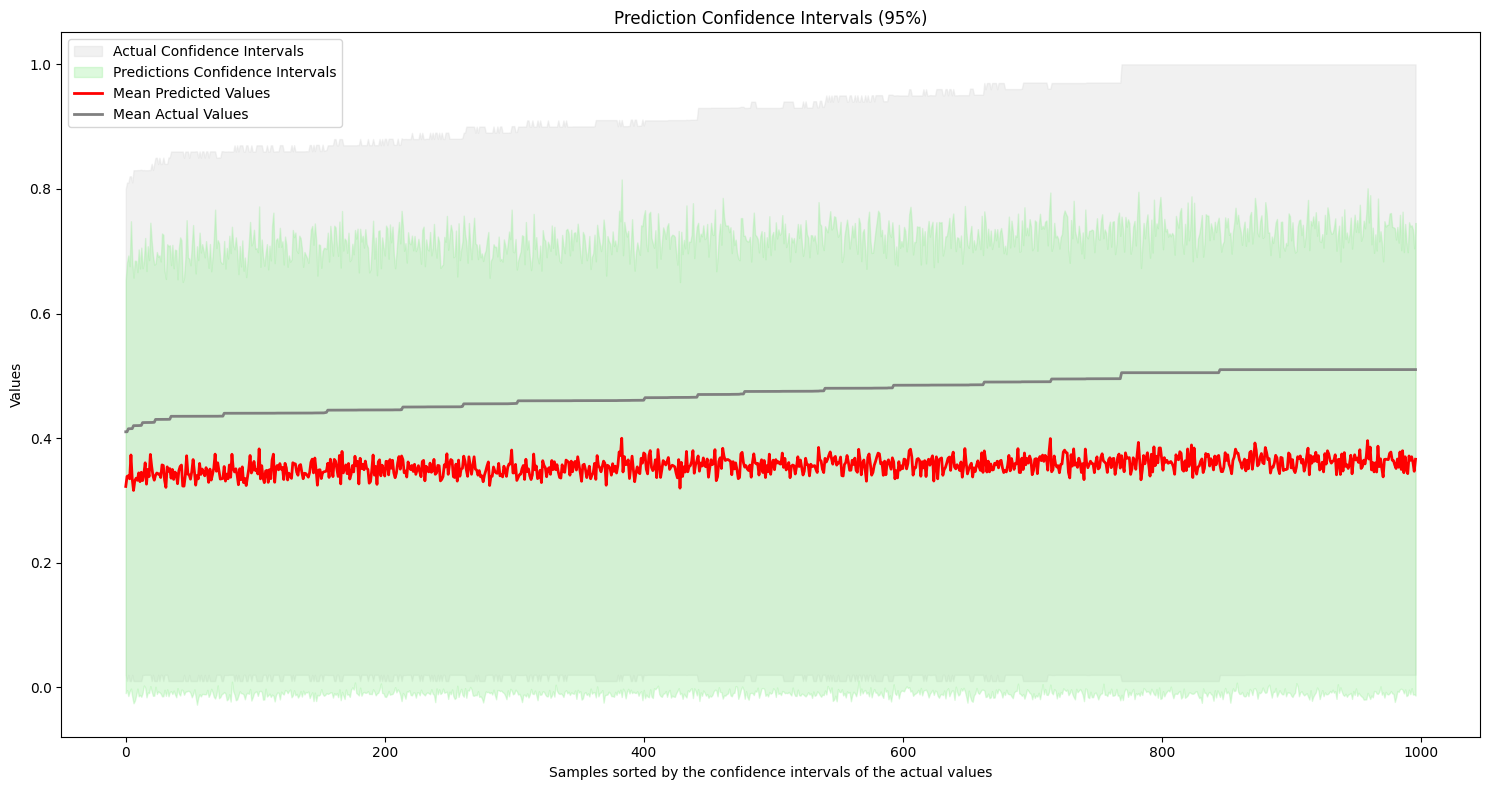

In [396]:
mean_true = np.mean(true_conf_intervals, axis=0)
sorted_indices = np.argsort(mean_true)
lower_bounds_true = true_conf_intervals[0, sorted_indices]
upper_bounds_true = true_conf_intervals[1, sorted_indices]
mean_true_sorted = mean_true[sorted_indices]
mean_predictions = np.mean(pred_conf_intervals, axis=0)
lower_bounds_predictions = pred_conf_intervals[0, sorted_indices]
upper_bounds_predictions = pred_conf_intervals[1, sorted_indices]
mean_predictions_sorted = mean_predictions[sorted_indices]

plt.figure(figsize=(15, 8))
plt.fill_between(range(len(mean_true_sorted)), lower_bounds_true, upper_bounds_true, color='lightgray', alpha=0.3, label='Actual Confidence Intervals')
plt.fill_between(range(len(mean_predictions_sorted)), lower_bounds_predictions, upper_bounds_predictions, color='lightgreen', alpha=0.3, label='Predictions Confidence Intervals')

plt.plot(range(len(mean_predictions_sorted)), mean_predictions_sorted, color='red', linewidth=2, label='Mean Predicted Values')
plt.plot(range(len(mean_true_sorted)), mean_true_sorted, color='gray', linewidth=2, label='Mean Actual Values')

plt.title('Prediction Confidence Intervals (95%)')
plt.xlabel('Samples sorted by the confidence intervals of the actual values')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

On the plot we can see that the red line, which is the mean predicted values, is consistently below the blue line, which is the mean actual values. This means that there is a systematic underprediction by the models. We can also see that the actual intervals are much wider than the predicted intervals, which means that the model predictions may not be capturing the full range of actual outcomes.

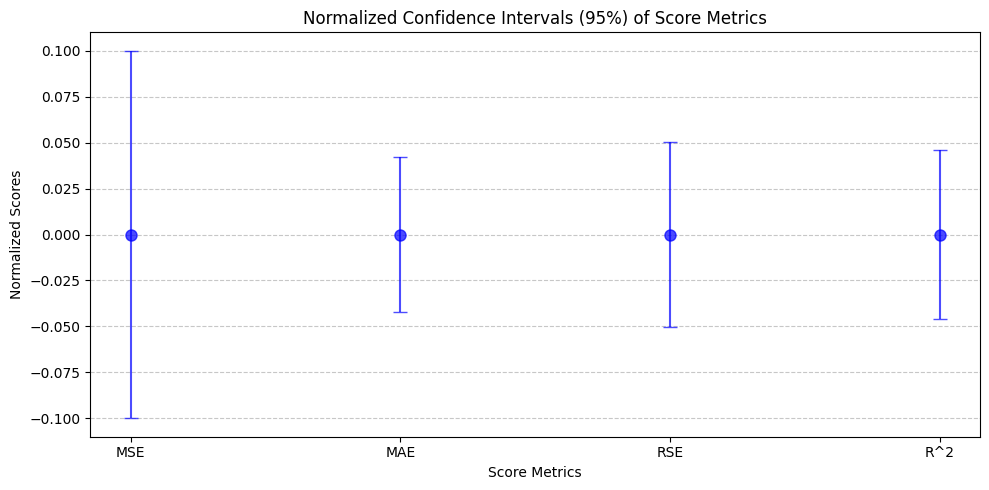

In [398]:
scores = [mse_score_conf_intervals, mae_score_conf_intervals, rse_score_conf_intervals, r2_score_conf_intervals]
score_labels = ['MSE', 'MAE', 'RSE', 'R^2']

normalized_intervals = [(score - np.mean(score)) / np.mean(score) for score in scores]
normalized_means = [np.mean(interval) for interval in normalized_intervals]
normalized_errors = [(interval[1] - interval[0]) / 2 for interval in normalized_intervals]

# Now, plot the normalized score metrics on a single graph
plt.figure(figsize=(10, 5))
x_positions = np.arange(len(scores))
plt.errorbar(x_positions, normalized_means, yerr=normalized_errors, fmt='o', capsize=5, markersize=8, color='blue', alpha=0.7)

# Add labels and title
plt.xticks(x_positions, score_labels)
plt.title('Normalized Confidence Intervals (95%) of Score Metrics')
plt.xlabel('Score Metrics')
plt.ylabel('Normalized Scores')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From the plot we can see that the confidence interval of the **MSE** evaluation metric is pretty wide, which suggests a higher unertainty in the MSE estimates. Since MSE is sensitive to outliers, this may mean that the data has some outliers. While the other 3 intervals are not so wide. The most narrowconfidence intervals seem to be for the **MAE** and **R2** evaluation metrics, which means that they are more robust measure of the average model performance, but are less sensitive to outliers.